In [4]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [6]:
import utils
import importlib 
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\berna\\ds\\tfm\\utils.py'>

In [7]:
# twitter_client = utils.TwitterClient()
# timeline = twitter_client.get_timeline(user)
# likes = twitter_client.get_likes(user)

In [8]:
user = './data/politicians/PabloIglesias.pkl'
actions = pd.read_pickle(user).reset_index()

In [9]:
timeline = actions[actions['type']!='Like']
likes = actions[actions['type']=='Like']

In [10]:
actions['type'].unique()

array(['RT', 'Mention', 'Text', 'Reply', 'Quoted', 'Like'], dtype=object)

In [11]:
users_rt_and_quotes = utils.user_frequency(actions[actions['type'].isin(['RT','Quoted'])], False)

In [29]:
users_actions = utils.user_frequency(actions, False)

In [31]:
y_actions = np.concatenate([np.zeros(v)+i+1 for i, v in enumerate(users_actions)])
x_actions = np.arange(len(y_actions))

In [26]:
y_rts = np.concatenate([np.zeros(v)+i+1 for i, v in enumerate(users_rt_and_quotes.values)])
x_rts = np.arange(len(y_rts))

In [32]:
y_df = pd.DataFrame(y_actions, columns=['Data'])
y_df.describe()

,Data
count,5368.000000
mean,586.984911
std,717.722878
min,1.000000
25%,29.000000
50%,208.000000
75%,1043.250000
max,2385.000000


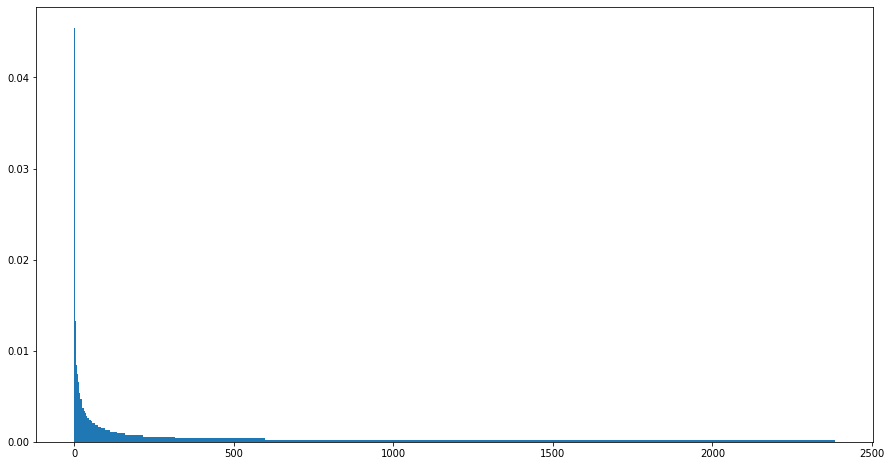

In [33]:
plt.hist(y_actions, bins=len(users_actions), density=True)
plt.show()

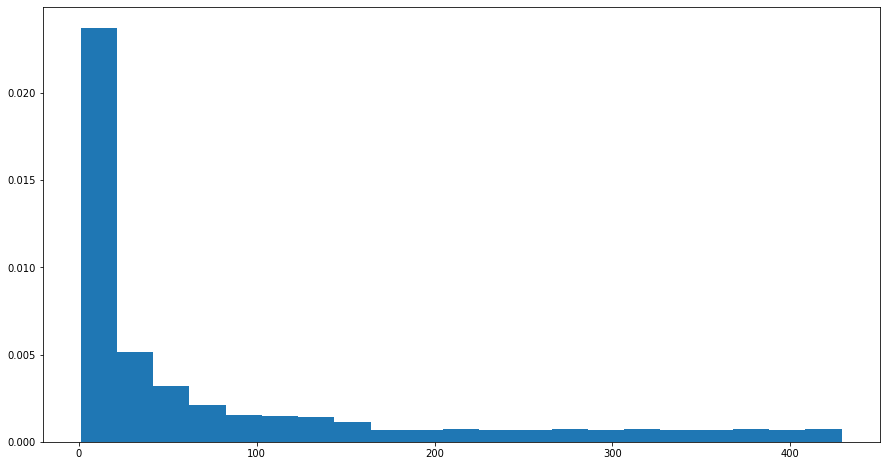

In [34]:
plt.hist(y_rts, bins='auto', density=True)
plt.show()

In [35]:
y_rts

array([  1.,   1.,   1., ..., 427., 428., 429.])

https://risk-engineering.org/static/PDF/slides-data-analysis.pdf

In [40]:
def plot_best_args(frequency, dist_name):
    y = np.concatenate([np.zeros(v)+i+1 for i, v in enumerate(frequency.values)])
    #first
    plt.subplot(131)
    dist = getattr(scipy.stats, dist_name)
    plt.hist(y, density=True, alpha=0.5, bins=len(users_actions))
    args = dist.fit(y, floc=0)
    x = np.linspace(y.min(), y.max(), 100)
    plt.plot(x, dist(*args).pdf(x))
    plt.title("{} fit on data".format(dist_name))
    
    #second
    plt.subplot(132)
    import statsmodels.distributions
    ecdf = statsmodels.distributions.ECDF(y)
    plt.plot(x, ecdf(x), label="Empirical CDF")
    plt.plot(x, dist(*args).cdf(x),label="{} fit".format(dist_name))
    plt.title("Cumulative failure intensity")
    plt.legend()
    #third
    plt.subplot(133)
    from scipy.stats import probplot
    probplot(y, dist=dist(*args),plot=plt, fit=True)
    plt.title("{} QQ-plot".format(dist_name))
    
    #plt.show()
    return args

In [41]:
def get_best_args(frequency):
    y = np.concatenate([np.zeros(v)+i+1 for i, v in enumerate(frequency.values)])
    dist = getattr(scipy.stats, dist_name)
    args = dist.fit(y, floc=0)
    # (exp, k, loc, lam) 
    return args

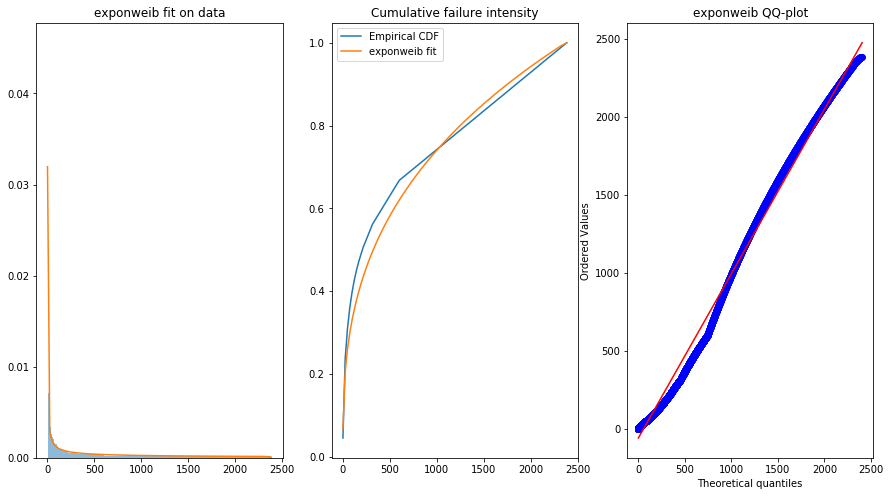

In [42]:
best_args = plot_best_args(users_actions, 'exponweib')

In [43]:
scipy.stats.kstest(y_actions, 'exponweib', args=best_args)

KstestResult(statistic=0.07369259789186794, pvalue=9.55867295908704e-26)

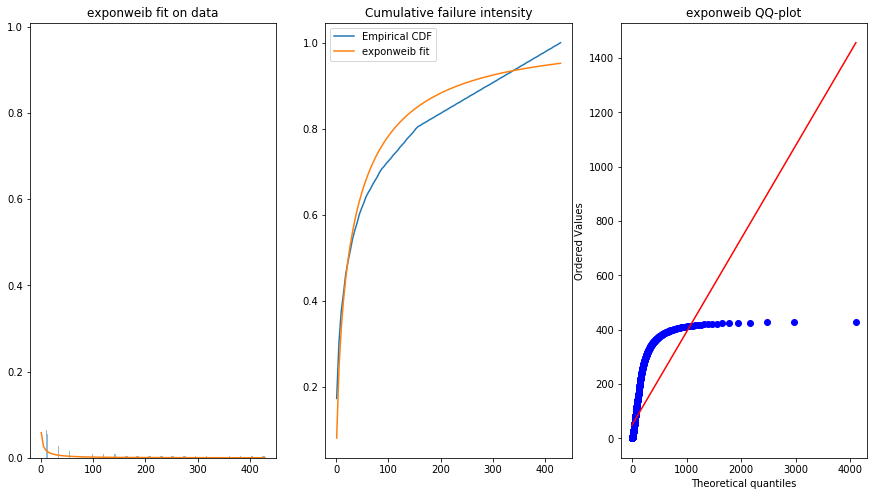

In [44]:
best_args_2 = plot_best_args(users_rt_and_quotes, 'exponweib')

In [45]:
scipy.stats.kstest(y_rts, 'exponweib', args=best_args_2)

KstestResult(statistic=0.0921541922747014, pvalue=8.793622116048939e-11)

https://pythonhealthcare.org/2018/05/03/81-distribution-fitting-to-data/